# Network Intrusion Detection

## Detection Method impletenting on Network Intrusion Detection System Dataset

## Importing libraries:

In [1]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
import time
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

## Data Creation:

4 datasets containing information and 1 dataset for features were downloaded from the website: 'https://research.unsw.edu.au/projects/unsw-nb15-dataset'. The separate datasets were merged into one dataset to work with. The file containing feature names were merged as column names.

In [2]:
#Creating a dictionary to save useful info
saved_dict = {}

In [3]:
# Reading datasets
dfs = []
for i in range(1,5):
    path = './UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
dataset = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

In [4]:
#This csv file contains names of all the features
df_col = pd.read_csv('./NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [5]:
#Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [6]:
# Renaming the dataset with proper column names
dataset.columns = df_col['Name']

In [7]:
# Saving useful info
saved_dict['columns'] = df_col['Name'][df_col['Name']!='label'].tolist()

In [8]:
del df_col

In [9]:
#creating a csv file
dataset.to_csv('./dataset1.csv', index=False)


## Data Preprocessing:

In [3]:
dataset1 = pd.read_csv('./dataset1.csv')

In [4]:
dataset1.shape

(2540047, 49)

In [5]:
dataset1.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [6]:
#Checking null values
dataset1.isnull().sum()

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

The values for the columns 'ct_flw_http_mthd', 'is_ftp_login' and 'attack_cat' show null values. Thus, they need to be further processed.

In [7]:
dataset1['ct_flw_http_mthd'] = dataset1.ct_flw_http_mthd.fillna(value=0)

In [8]:
# Even though it's a binary column, but there're values like 2 and 4
dataset1['is_ftp_login'].value_counts()

0.0    1066593
1.0      43389
4.0        156
2.0         30
Name: is_ftp_login, dtype: int64

In [9]:
dataset1['is_ftp_login'] = (dataset1.is_ftp_login.fillna(value=0)).astype(int)

In [10]:
dataset1['attack_cat'].value_counts()

Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: attack_cat, dtype: int64

In [11]:
# filling null values with "normal"
dataset1['attack_cat'] = dataset1.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [12]:
dataset1['attack_cat'].value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: attack_cat, dtype: int64

In [13]:
# Checking if there are any more no Null values in the dataset 
dataset1.isnull().sum().sum()

0

In [14]:
# Getting name of all the columns
dataset1.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object')

In [15]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [16]:
# Categorical feature names
dataset1.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object')

In [17]:
# In the research paper it was mentioned that, this is a numerical feature not a categorical
dataset1['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', ' ', '2', '4'], dtype=object)

In [18]:
# Removing empty space and converting it to numerical
dataset1['ct_ftp_cmd'] = dataset1['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [19]:
dataset1['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3])

In [20]:
# Categorical feature names
dataset1.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object')

In [21]:
# Numeric features names
dataset1.select_dtypes(include=np.number).columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')

In [22]:
# cross-checking the binary columns 
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(dataset1[col].value_counts())
    print()

0    2535852
1       4195
Name: is_sm_ips_ports, dtype: int64

0    2496472
1      43389
4        156
2         30
Name: is_ftp_login, dtype: int64



There are other values than '0' and '1' in the column 'is_ftp_login'. Values greater than 1 are converted to one for making it a true binary column. 

In [23]:
dataset1['is_ftp_login'] = np.where(dataset1['is_ftp_login']>1, 1, dataset1['is_ftp_login'])

In [24]:
dataset1['is_ftp_login'].value_counts()

0    2496472
1      43575
Name: is_ftp_login, dtype: int64

In [25]:
dataset1['service'].value_counts()

-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [26]:
# removing all the "-" and replacing those with "None"
dataset1['service'] = dataset1['service'].apply(lambda x:"None" if x=="-" else x)

In [27]:
dataset1['service'].value_counts()

None        1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [28]:
# In the research paper there are not 10 unique values
dataset1['attack_cat'].nunique()

11

In [29]:
dataset1['attack_cat'].value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: attack_cat, dtype: int64

It can be seen there are two values named 'backdoor' and 'backdoors' which are basically same. All are converted to 'backdoor' for better training of the dataset.

In [30]:
dataset1['attack_cat'] = dataset1['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [31]:
dataset1['attack_cat'].value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: attack_cat, dtype: int64

Now, correlation can be considered as the next step.
The dataset contains a large number of features. Features with high correlation values can be removed for better calculation.

### Feature Selection

In [32]:
# Utility function
def multi_corr(col1, col2="label", df=dataset1):
   
    corr = df[[col1, col2]].corr().iloc[0,1]

    print("Correlation : ", corr)

In [33]:
def corr(col1, col2="label", df=dataset1):
    
    return df[[col1, col2]].corr().iloc[0,1]

In [34]:
# Selecting all the features with high correlation values with other features
corr_matrix = dataset1.corr().abs()

# Selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [35]:
print(to_drop)

['sloss', 'dloss', 'dpkts', 'dwin', 'ltime', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_src_ltm']


In [36]:
# removing the highly correlated features from dataset
dataset1.drop(columns=to_drop, inplace=True)

In [37]:
# Dropping columns which are not useful for the classification
# attack_cat is for multiclass classification
dataset1.drop(['srcip', 'sport', 'dstip', 'dsport', 'attack_cat'], axis=1, inplace=True)

In [38]:
dataset1 = dataset1.dropna()

In [39]:
dataset1.reset_index(drop=True, inplace=True)

In [40]:
dataset1.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
0,udp,CON,0.001055,132,164,31,29,dns,500473.93750,621800.93750,...,0,0,0.0,0,0,3,1,3,1,0
1,udp,CON,0.036133,528,304,31,29,None,87676.08594,50480.17188,...,0,0,0.0,0,0,2,2,3,1,0
2,udp,CON,0.001119,146,178,31,29,dns,521894.53130,636282.37500,...,0,0,0.0,0,0,12,1,2,1,0
3,udp,CON,0.001209,132,164,31,29,dns,436724.56250,542597.18750,...,0,0,0.0,0,0,6,1,1,1,0
4,udp,CON,0.001169,146,178,31,29,dns,499572.25000,609067.56250,...,0,0,0.0,0,0,7,1,1,1,0


In [41]:
dataset1.shape

(2540047, 36)

In [42]:
dataset_backup = dataset1
dataset_backup

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
0,udp,CON,0.001055,132,164,31,29,dns,500473.937500,621800.937500,...,0,0,0.0,0,0,3,1,3,1,0
1,udp,CON,0.036133,528,304,31,29,None,87676.085940,50480.171880,...,0,0,0.0,0,0,2,2,3,1,0
2,udp,CON,0.001119,146,178,31,29,dns,521894.531300,636282.375000,...,0,0,0.0,0,0,12,1,2,1,0
3,udp,CON,0.001209,132,164,31,29,dns,436724.562500,542597.187500,...,0,0,0.0,0,0,6,1,1,1,0
4,udp,CON,0.001169,146,178,31,29,dns,499572.250000,609067.562500,...,0,0,0.0,0,0,7,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,tcp,FIN,0.087306,320,1828,31,29,ftp-data,24465.671880,146610.765600,...,0,0,0.0,0,0,1,3,3,1,0
2540043,tcp,CON,0.365058,456,346,31,29,ftp,8743.816406,6333.240234,...,0,0,0.0,1,2,2,2,2,2,0
2540044,tcp,CON,6.335154,1802,2088,31,29,ftp,2204.839844,2549.582764,...,0,0,0.0,1,2,2,4,2,2,0
2540045,tcp,CON,2.200934,3498,166054,31,29,http,12496.513670,598375.062500,...,0,0,2.0,0,0,1,2,4,2,0


In [43]:
dataset1 = dataset_backup

### Categorical Encoding

All but three of the features show numerical data. The three features, namely proto, state and service are data of categorical types and thus, categorical encoding is performed to convert the text data to numerical data. 

In [44]:
dataset1['proto']=dataset1.proto.astype('category').cat.codes

In [45]:
dataset1

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
0,120,CON,0.001055,132,164,31,29,dns,500473.937500,621800.937500,...,0,0,0.0,0,0,3,1,3,1,0
1,120,CON,0.036133,528,304,31,29,None,87676.085940,50480.171880,...,0,0,0.0,0,0,2,2,3,1,0
2,120,CON,0.001119,146,178,31,29,dns,521894.531300,636282.375000,...,0,0,0.0,0,0,12,1,2,1,0
3,120,CON,0.001209,132,164,31,29,dns,436724.562500,542597.187500,...,0,0,0.0,0,0,6,1,1,1,0
4,120,CON,0.001169,146,178,31,29,dns,499572.250000,609067.562500,...,0,0,0.0,0,0,7,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,114,FIN,0.087306,320,1828,31,29,ftp-data,24465.671880,146610.765600,...,0,0,0.0,0,0,1,3,3,1,0
2540043,114,CON,0.365058,456,346,31,29,ftp,8743.816406,6333.240234,...,0,0,0.0,1,2,2,2,2,2,0
2540044,114,CON,6.335154,1802,2088,31,29,ftp,2204.839844,2549.582764,...,0,0,0.0,1,2,2,4,2,2,0
2540045,114,CON,2.200934,3498,166054,31,29,http,12496.513670,598375.062500,...,0,0,2.0,0,0,1,2,4,2,0


In [46]:
dataset1['state']=dataset1.state.astype('category').cat.codes
dataset1['service']=dataset1.service.astype('category').cat.codes

In [47]:
dataset1

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
0,120,2,0.001055,132,164,31,29,2,500473.937500,621800.937500,...,0,0,0.0,0,0,3,1,3,1,0
1,120,2,0.036133,528,304,31,29,0,87676.085940,50480.171880,...,0,0,0.0,0,0,2,2,3,1,0
2,120,2,0.001119,146,178,31,29,2,521894.531300,636282.375000,...,0,0,0.0,0,0,12,1,2,1,0
3,120,2,0.001209,132,164,31,29,2,436724.562500,542597.187500,...,0,0,0.0,0,0,6,1,1,1,0
4,120,2,0.001169,146,178,31,29,2,499572.250000,609067.562500,...,0,0,0.0,0,0,7,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,114,5,0.087306,320,1828,31,29,4,24465.671880,146610.765600,...,0,0,0.0,0,0,1,3,3,1,0
2540043,114,2,0.365058,456,346,31,29,3,8743.816406,6333.240234,...,0,0,0.0,1,2,2,2,2,2,0
2540044,114,2,6.335154,1802,2088,31,29,3,2204.839844,2549.582764,...,0,0,0.0,1,2,2,4,2,2,0
2540045,114,2,2.200934,3498,166054,31,29,5,12496.513670,598375.062500,...,0,0,2.0,0,0,1,2,4,2,0


### Changing encoding of label

In [48]:
dataset1['label'] = dataset1['label'].replace([1],-1)
dataset1['label'] = dataset1['label'].replace([0],1)
dataset1.label.unique

<bound method Series.unique of 0          1
1          1
2          1
3          1
4          1
          ..
2540042    1
2540043    1
2540044    1
2540045    1
2540046   -1
Name: label, Length: 2540047, dtype: int64>

A label of 1 would mean the record is normal and -1 would mean the record is of an attack.

In [49]:
dataset1.label.value_counts()

 1    2218764
-1     321283
Name: label, dtype: int64

### Data standardizing and Train - Test split

In [50]:
X = dataset1.drop('label', axis='columns')

# Standardized
scaler = MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

y = dataset1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=140)

In [51]:
X

array([[8.95522388e-01, 1.33333333e-01, 1.20068681e-07, ...,
        0.00000000e+00, 3.03030303e-02, 0.00000000e+00],
       [8.95522388e-01, 1.33333333e-01, 4.11226697e-06, ...,
        1.51515152e-02, 3.03030303e-02, 0.00000000e+00],
       [8.95522388e-01, 1.33333333e-01, 1.27352468e-07, ...,
        0.00000000e+00, 1.51515152e-02, 0.00000000e+00],
       ...,
       [8.50746269e-01, 1.33333333e-01, 7.20998660e-04, ...,
        4.54545455e-02, 1.51515152e-02, 1.69491525e-02],
       [8.50746269e-01, 1.33333333e-01, 2.50486486e-04, ...,
        1.51515152e-02, 4.54545455e-02, 1.69491525e-02],
       [8.50746269e-01, 1.33333333e-01, 1.07320232e-04, ...,
        1.51515152e-02, 4.54545455e-02, 1.69491525e-02]])

The label data is separated from the feature data. The feature data is then standardized so that all the values lie between 0 and 1. This aids the classifiers in comparing the data of each feature column and making more accurate predictions. The data is then split with 30% of the data being set aside for testing.

In [52]:
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(1778032, 35) (1778032,)

(762015, 35) (762015,)


## Building Classifiers:

### Decision Tree

In [62]:
startTime = time.time()

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
Prediction = dt.predict(X_test)
Score = dt.score(X_test,y_test)
print ("The Score of the Decision Tree Classifier is", Score * 100)

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

The Score of the Decision Tree Classifier is 99.46693962717269
Execution time in sec : 20.78051233291626


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Prediction))

print(confusion_matrix(y_test, Prediction))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98     96751
           1       1.00      1.00      1.00    665264

    accuracy                           0.99    762015
   macro avg       0.99      0.99      0.99    762015
weighted avg       0.99      0.99      0.99    762015

[[ 94668   2083]
 [  1979 663285]]


The accuracy of the Decision Tree classifier is very good with 99.5% of the data correctly classifed. The recall, precision and f1-score for attack data all came out to be very high (98%) as well, which shows that the model performs really well in detecting intrusions to networks. The execution time is reasonably low, taking around 21 seconds to run.

### Logistic Regression

In [64]:
startTime = time.time()

# Logistic Regression
lr = LogisticRegression(C=10000)
lr.fit(X_train,y_train)
Prediction = lr.predict(X_test)

# Find and print the score
Score = lr.score(X_test, y_test)
print("Logistic Regression score: ", Score * 100)

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

Logistic Regression score:  98.81524641903374
Execution time in sec : 47.84714961051941


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Prediction))

print(confusion_matrix(y_test, Prediction))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95     96751
           1       1.00      0.99      0.99    665264

    accuracy                           0.99    762015
   macro avg       0.97      0.98      0.97    762015
weighted avg       0.99      0.99      0.99    762015

[[ 94047   2704]
 [  6324 658940]]


The Logistic Regression classifier had an accuracy of 99%, however the precision, recall and f1-score for the attack data (94%, 97%, 95% respectively) were all slighly worse than the Decision tree classifier. The execution time was significantly higher, taking about 48 seconds to run.

### Gaussian Naive Bayes

In [82]:
startTime = time.time()

gnb = GaussianNB()
gnb.fit(X_train,y_train)
Prediction = gnb.predict(X_test)

# Find and print the score
Score = gnb.score(X_test,y_test)
print("The Score of the Gaussian Naive Bayes classifier is", Score * 100)

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

The Score of the Gaussian Naive Bayes classifier is 90.1340524792819
Execution time in sec : 4.00256085395813


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, Prediction))

print(confusion_matrix(y_test, Prediction))

              precision    recall  f1-score   support

          -1       0.56      0.99      0.72     96751
           1       1.00      0.89      0.94    665264

    accuracy                           0.90    762015
   macro avg       0.78      0.94      0.83    762015
weighted avg       0.94      0.90      0.91    762015

[[ 95309   1442]
 [ 73738 591526]]


The accuracy of the Gaussian Naive Bayes Classifier is much lower than the other classifiers, but is still 90%, which shows that it is performing pretty well. The precision for the attack data is significantly lower than the other classifiers with 56%. However, the recall value of the attack data for this classifier is the best among the others, with 99%. The excution time is the lowest, taking about 4 seconds to run.

### RandomForest

In [106]:
startTime = time.time()

#Create an RF Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets
clf.fit(X_train,y_train)


# prediction on test set
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy in RandomForest:",metrics.accuracy_score(y_test, y_pred))

executionTime = (time.time() - startTime)
print('Execution time in secs : ' + str(executionTime))


Accuracy in RandomForest: 0.9950893355117681
Execution time in secs : 301.89126420021057


In [107]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98     96751
           1       1.00      1.00      1.00    665264

    accuracy                           1.00    762015
   macro avg       0.99      0.99      0.99    762015
weighted avg       1.00      1.00      1.00    762015

[[ 94724   2027]
 [  1715 663549]]


The accuracy of the Random Forest Classifier is the highest among the other classifers with 99.5%. The precision, recall and f1-score values for attack data are reasonably high as well, with 98% each. However, the execution time was the highest, taking around 302 seconds to run.

#### Analysis of Classification models

Choosing the best classifier in the case of detecting network intrusions, the one with the highest recall value should be considered over the ones with higher precision. This is because precision shows the proportion of correctly predicted attacks with respect to the number of falsely predicted normals. A lower precision in this case would mean that the Network Intrusion Detection System (NIDS) is labelling most of the supicious data as attacks, even when they are not. It is a false alarm and is an inconvenience at best. On the other hand, recall is the proportion of correctly predicted network attacks with respect to the number of false predicted attacks. A lower recall would mean that the NIDS is failing to identify attacks correctly and labelling more attacks as being normal requests to access the network. This is worse and is potentially more dangerous for networks. Even though the Random Forest Classifier is performing the most accurate classification of the dataset, and is being more precise, Gaussian Niave Bayes is the best choice for building a NIDS, as it is the most successful classifier in identifying attacks correctly and has the lowest False Negative rate.

## Anomaly Detection:

In [53]:
#Checking the anomaly rate of the dataset
print('\n Anomaly rate: %f \n' % (-1.0*(y-1).sum()/2.0/X.shape[0]))


 Anomaly rate: 0.126487 



### IsolationForest 

Masks are created to filter the dataset by whether or not the observation belongs to normal or attack class.
Then it is isolated and only normal training data is used for fitting the models.


In [54]:
train_normal = y_train== 1 #normal class
train_at = y_train== -1 #attack class

#### Hyperparameter Tuning

In [68]:
startTime = time.time()

# Trying different sample size ('max_samples' parameter) for iforest to identify a good one. Plot the relationship for the size from 2**5 to 2**14 with an exponential step 2**i.

auc_scores = []
sample_sizes = []
for i in range(5, 15):
    sample_sizes.append(2**i)
    detector_if = IsolationForest(max_samples=2**i,random_state=1)
    detector_if.fit(X_train[train_normal])
    
    y_train_pred = detector_if.predict(X_train)
    y_test_pred = detector_if.predict(X_test)

    # Predicting the Yes/No label
    auc = roc_auc_score(y_test, y_test_pred)
    
    auc_scores.append(auc)

print('Prediction_AUC Scores: ', auc_scores)


executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

Prediction_AUC Scores:  [0.8803420577698835, 0.8078562652818052, 0.9136154170675806, 0.7142122120784599, 0.71931120799938, 0.6417623472843088, 0.6207690905755231, 0.60148185399476, 0.5701915810104834, 0.5841954170012147]
Execution time in sec : 1818.9528217315674


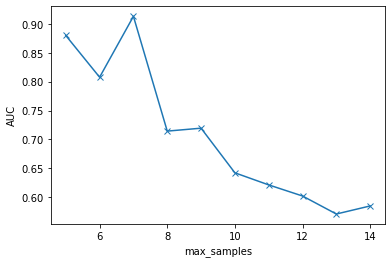

In [59]:
auc_scores =[0.8803420577698835, 0.8078562652818052, 0.9136154170675806, 0.7142122120784599, 0.71931120799938, 0.6417623472843088, 0.6207690905755231, 0.60148185399476, 0.5701915810104834, 0.5841954170012147]
# Plot the relationship between auc and max_samples
plt.plot(range(5,15), auc_scores, marker='x')
plt.xlabel('max_samples')
plt.ylabel('AUC')
plt.show()

#### Evaluating AUC and Execution time

In [69]:
#Training on normal data
startTime = time.time()

ilf = IsolationForest(max_samples= 128 ,random_state=1)
ilf.fit(X_train[train_normal])

y_train_pred = ilf.predict(X_train)
y_test_pred = ilf.predict(X_test)


# Evaluating using AUC (Area Under Curve)
y_score = ilf.decision_function(X_train)
print('Evaluation_AUC Score: ', roc_auc_score(y_train, y_score))


executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

Prediction_AUC Score:  0.9136154170675806

Evaluation_AUC Score:  0.9529728363117199
Execution time in sec : 230.11228704452515


The conventional way is also explored here by using full training data for training purpose.

In [70]:
#Training on full data
startTime = time.time()

ilf1 = IsolationForest(max_samples= 128 ,random_state=1)
ilf1.fit(X_train)

y1_test_pred = ilf1.predict(X_test)

# Predicting the Yes/No label
print('Prediction_AUC Score: ', roc_auc_score(y_test, y1_test_pred))
print()

# Evaluating using AUC (Area Under Curve)
y1_score = ilf1.decision_function(X_train)
print('Evaluation_AUC Score: ', roc_auc_score(y_train, y1_score))

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

Prediction_AUC Score:  0.5964908493632628

Evaluation_AUC Score:  0.8452938285899192
Execution time in sec : 158.88471341133118


#### Analysis 

It can be seen from the results that the AUC Score of Anomaly detection is better while the training was done with normal data. Though the execution time was also a bit less for the latter one, the AUC score was much higher. 
For the first model, the dataset is trained with normal data, and then the profile is built for checking what normal instances should look like. That information is then further used for prediction on unseen data based on the previously established boundary.
Therefore the first model is more efficient.

### LocalOutlierFactor

LOF detection model was considered after Isolation Forest as an anomaly detection model. But it took too long to execute everytime it was attempted. Tried to execute the code for ~7 hours, but the execution could not be completed.

In [ ]:
'''
startTime = time.time()
#Tuning
#Try different values of k ('n_neighbors' parameter) for LOF to identify a good one. Plot the relationship for k changing from 5 to 50 with 5 as the step.

auc2_scores = []
for i in range(1, 20, 5):
    detector_lof = LocalOutlierFactor(n_neighbors=i, novelty=True)
    detector_lof.fit(X_train[train_normal])
    y2_score = detector_lof.decision_function(X_train)
    auc2 = roc_auc_score(y_train, y2_score)
    auc2_scores.append(auc2)

print('Evaluation_AUC Scores: ', auc2_scores)

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

'''

In [ ]:
'''
startTime = time.time()

# Create the LOF model. Note here we need to set 'novelty' parameter as 'True' to get LOF scores
lof = LocalOutlierFactor(n_neighbors=15, novelty=True)

# Train the model (Compute the LOF scores)
lof.fit(X_train[train_normal])

# Obtain anomaly score (Note that this is not the yes/no prediction as we don't know the threshold)
y_score = lof.decision_function(X_train)

#y_pred_test = lof.predict(X_test)

# Evaluate using AUC (Area Under Curve)
print('Evaluation_AUC Score: ', roc_auc_score(y_train, y_score))


executionTime = (time.time() - startTime)
print('Execution time for in secs : ' + str(executionTime))

'''

As implementing LOF over the entire dataset seemed quite impossible, we randomly took 20% of the dataset to perform anomaly detection, specially for the purpose of comparison between the models.

### Creating dataset with 20% data of the entire dataset 

In [91]:
dataset1.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
0,120,2,0.001055,132,164,31,29,2,500473.93750,621800.93750,...,0,0,0.0,0,0,3,1,3,1,1
1,120,2,0.036133,528,304,31,29,0,87676.08594,50480.17188,...,0,0,0.0,0,0,2,2,3,1,1
2,120,2,0.001119,146,178,31,29,2,521894.53130,636282.37500,...,0,0,0.0,0,0,12,1,2,1,1
3,120,2,0.001209,132,164,31,29,2,436724.56250,542597.18750,...,0,0,0.0,0,0,6,1,1,1,1
4,120,2,0.001169,146,178,31,29,2,499572.25000,609067.56250,...,0,0,0.0,0,0,7,1,1,1,1


In [92]:
data_part=dataset1.sample(frac=0.02, replace=True, random_state=1)

In [93]:
data_part.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
128037,114,5,0.141949,9608,12194,31,29,11,5.365871e+05,6.811461e+05,...,0,0,0.0,0,0,1,1,2,1,1
491755,114,5,0.193172,37184,3276,31,29,9,1.510322e+06,1.323173e+05,...,0,0,0.0,0,0,1,3,2,1,1
491263,120,2,0.001361,146,178,31,29,2,4.290962e+05,5.231448e+05,...,0,0,0.0,0,0,2,1,1,1,1
836489,114,5,0.022508,2334,16822,31,29,0,8.068242e+05,5.821930e+06,...,0,0,0.0,0,0,5,3,2,1,1
2468555,120,6,0.000005,264,0,60,0,2,2.112000e+08,0.000000e+00,...,0,0,0.0,0,0,37,37,37,18,1


In [94]:
data_part.reset_index(drop=True, inplace=True)

In [95]:
data_part.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,sload,dload,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,label
0,114,5,0.141949,9608,12194,31,29,11,5.365871e+05,6.811461e+05,...,0,0,0.0,0,0,1,1,2,1,1
1,114,5,0.193172,37184,3276,31,29,9,1.510322e+06,1.323173e+05,...,0,0,0.0,0,0,1,3,2,1,1
2,120,2,0.001361,146,178,31,29,2,4.290962e+05,5.231448e+05,...,0,0,0.0,0,0,2,1,1,1,1
3,114,5,0.022508,2334,16822,31,29,0,8.068242e+05,5.821930e+06,...,0,0,0.0,0,0,5,3,2,1,1
4,120,6,0.000005,264,0,60,0,2,2.112000e+08,0.000000e+00,...,0,0,0.0,0,0,37,37,37,18,1


In [96]:
data_part.shape

(50801, 36)

In [97]:
#creating a csv file
data_part.to_csv('./data_part.csv', index=False)

In [53]:
data_part = pd.read_csv('./data_part.csv')

#### Standardizing

In [54]:
Xp = data_part.drop('label', axis='columns')

# Standardized
scaler = MinMaxScaler()
Xp_data = Xp.values
Xp_scaled = scaler.fit_transform(Xp_data)
Xp = Xp_scaled

yp = data_part['label']
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.30, random_state=1)

#### Anomaly detection: Isolation Forest

In [66]:
startTime = time.time()

# Trying different sample size ('max_samples' parameter) for iforest to identify a good one. Plot the relationship for the size from 2**5 to 2**14 with an exponential step 2**i.

auc5_scores = []
sample_sizes = []
for i in range(5, 15):
    sample_sizes.append(2**i)
    detector_if = IsolationForest(max_samples=2**i,random_state=1)
    detector_if.fit(Xp_train)
    
    yp_test_pred = detector_if.predict(Xp_test)

    # Predicting the Yes/No label
    auc5 = roc_auc_score(yp_test, yp_test_pred)
    
    auc5_scores.append(auc5)

print('Prediction_AUC Scores: ', auc5_scores)


executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

Prediction_AUC Scores:  [0.6466267929393252, 0.6318849762808136, 0.5808587979096064, 0.5871333727492964, 0.5691959568251268, 0.5368766629838408, 0.5244821856966931, 0.5110770287390192, 0.5089071516534294, 0.5063619983657346]
Execution time in sec : 19.24613118171692


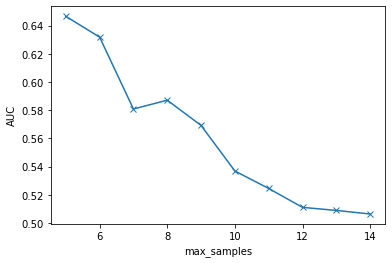

In [67]:
# Plot the relationship between auc and max_samples
plt.plot(range(5,15), auc5_scores, marker='x')
plt.xlabel('max_samples')
plt.ylabel('AUC')
plt.show()

In [68]:
startTime = time.time()

ilfp = IsolationForest(max_samples= 32 ,random_state=1)
ilfp.fit(Xp_train)

yp_test_pred = ilfp.predict(Xp_test)


# Evaluating using AUC (Area Under Curve)
yp_score = ilfp.decision_function(Xp_train)
print('Evaluation_AUC Score: ', roc_auc_score(yp_train, yp_score))

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))

Evaluation_AUC Score:  0.8303317525453907
Execution time in sec : 2.9668784141540527


#### Anomaly detection: LocalOutlierFactor

In [56]:
startTime = time.time()
#Tuning
#Try different values of k ('n_neighbors' parameter) for LOF to identify a good one. Plot the relationship for k changing from 20 to 60 with 5 as the step.

auc2_scores = []
for i in range(20, 60, 5):
    detector_lof = LocalOutlierFactor(n_neighbors=i, novelty=True)
    detector_lof.fit(Xp_train)
    y2_score = detector_lof.decision_function(Xp_train)
    auc2 = roc_auc_score(yp_train, y2_score)
    auc2_scores.append(auc2)

print('Evaluation_AUC Scores: ', auc2_scores)

executionTime = (time.time() - startTime)
print('Execution time in sec : ' + str(executionTime))


Evaluation_AUC Scores:  [0.5460046045140883, 0.5482342704718497, 0.5506408877782697, 0.5551442812705494, 0.5601688979401194, 0.5673901528922259, 0.5719058740374313, 0.5717468342714194]
Execution time in sec : 229.4422287940979


In [57]:
print(auc2_scores.index(max(auc2_scores)))

6


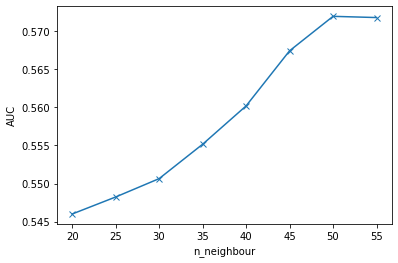

In [58]:
# Plot the relationship between auc and k
plt.plot(range(20, 60, 5), auc2_scores, marker='x')
plt.xlabel('n_neighbour')
plt.ylabel('AUC')
plt.show()

The above code returns the highest AUC_score at 6th index value, where the value of n_neighbours is 50

In [104]:
startTime = time.time()

# Create the LOF model. Note here we need to set 'novelty' parameter as 'True' to get LOF scores
lofp = LocalOutlierFactor(n_neighbors=50, novelty=True)
lofp.fit(Xp_train)

# Obtain anomaly score (Note that this is not the yes/no prediction as we don't know the threshold)
ypp_score = lofp.decision_function(Xp_train)

yp_pred_test = lofp.predict(Xp_test)

# Evaluate using AUC (Area Under Curve)
print('Evaluation_AUC Score: ', roc_auc_score(yp_train, ypp_score))


executionTime = (time.time() - startTime)
print('Execution time for in secs : ' + str(executionTime))


Evaluation_AUC Score:  0.5719058740374313
Execution time for in secs : 36.304051637649536


#### Analysis of both Anomaly detection models based on AUC_Score and Execution time:

While using 20% of the entire dataset, we could perform the detection on two Anomaly Detector Model: IsolationForest and LocalOutlierFactor.

For the IsolationForest Model, we were able to execute the code in 2.8 secs with an AUC_score of 82.6%. Whereas, the  LocalOutlierFactor model took 12x more time to execute and the AUC_score was around 57%.

From the performance metrics, it can be decided that IsolationForest Model is a better model for the Intrusion Detection data we are working on.